In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import warnings

warnings.filterwarnings("ignore")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [62]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

(<matplotlib.image.AxesImage at 0x7f30ab60cfd0>,
 <matplotlib.image.AxesImage at 0x7f30ab723790>)

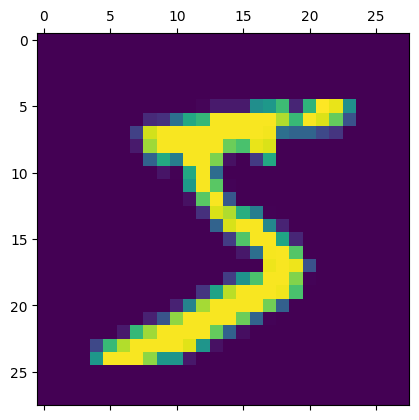

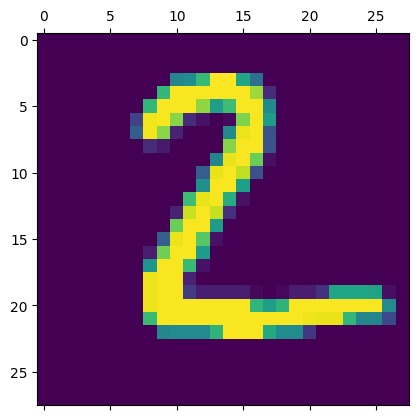

In [63]:
plt.matshow(x_train[0]), plt.matshow(x_test[1])

# Normalize the data


In [64]:
x_train = x_train / 255
x_test = x_test / 255

In [65]:
x_train_flatten = x_train.reshape(len(x_train), 28 * 28)
x_test_flatten = x_test.reshape(len(x_test), 28 * 28)

x_train_flatten.shape, x_test_flatten.shape

((60000, 784), (10000, 784))

# Very simple neural network with no hidden layers


In [66]:
model1 = Sequential(
    [
        Dense(10, input_shape=(784,), activation="sigmoid"),
    ]
)
model1.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model1.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.8134 - loss: 0.7211
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - accuracy: 0.9121 - loss: 0.3149
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9207 - loss: 0.2854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 0.9255 - loss: 0.2690
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.9247 - loss: 0.2729


In [67]:
model1.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.9126 - loss: 0.3047


[0.2683476209640503, 0.9254999756813049]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step


<Axes: >

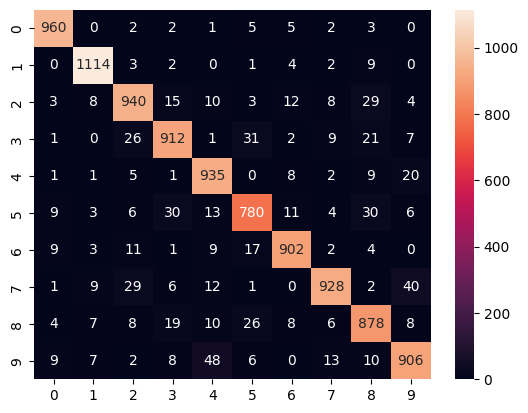

In [68]:
y_predicted = model1.predict(x_test_flatten)
y_predicted_labels = [
    np.argmax(i) for i in y_predicted
]  # for making the prediction in the form of labels, by taking the maximum value of the prediction
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt="d")

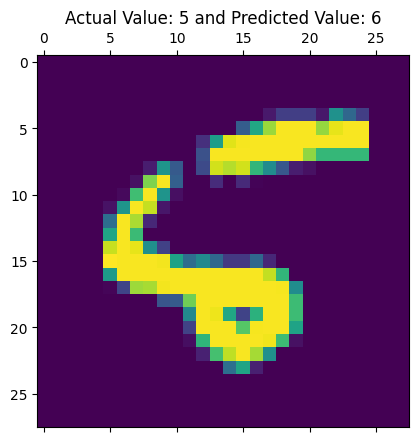

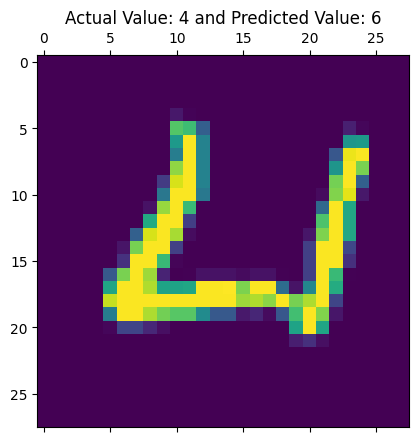

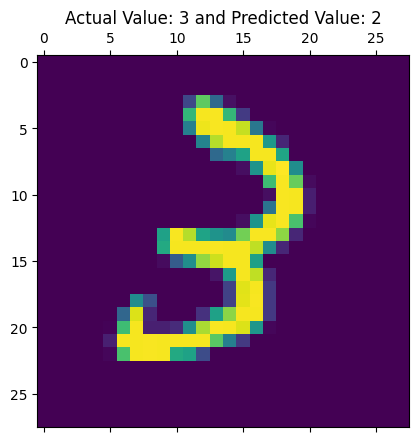

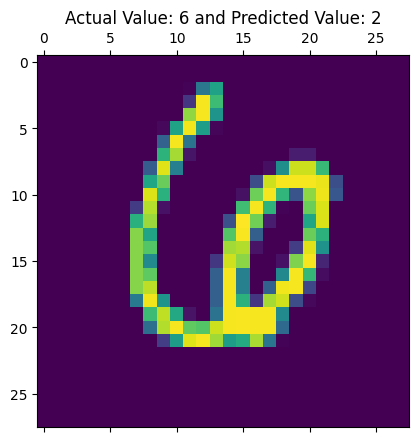

In [69]:
for i in range(100):
    if y_test[i] != y_predicted_labels[i]:
        plt.matshow(x_test[i])
        plt.title(
            f"Actual Value: {y_test[i]} and Predicted Value: {y_predicted_labels[i]}"
        )

# Using hidden layer


In [70]:
model2 = Sequential(
    [Dense(100, input_shape=(784,), activation="relu"), Dense(10, activation="sigmoid")]
)
model2.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model2.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.8761 - loss: 0.4457
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.9628 - loss: 0.1300
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.9747 - loss: 0.0864
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.9810 - loss: 0.0656
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.9843 - loss: 0.0505


In [71]:
model2.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.9684 - loss: 0.0996


[0.08878174424171448, 0.9721999764442444]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


<Axes: >

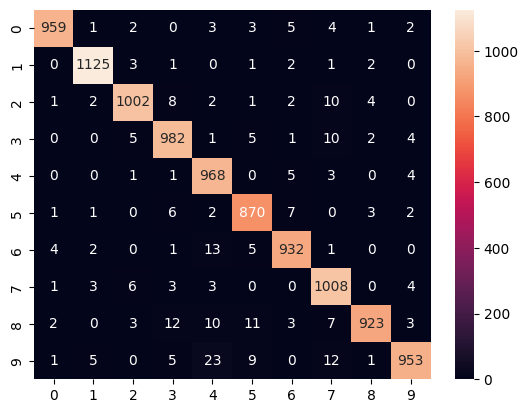

In [72]:
y_predicted = model2.predict(x_test_flatten)
y_predicted_labels = [
    np.argmax(i) for i in y_predicted
]  # for making the prediction in the form of labels, by taking the maximum value of the prediction
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt="d")

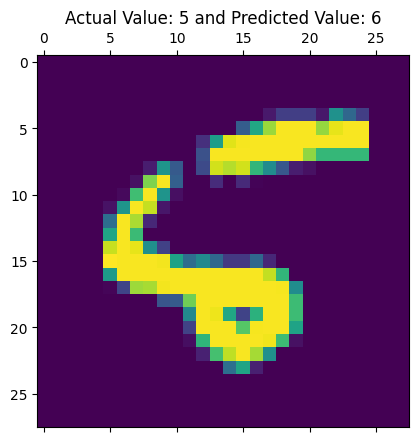

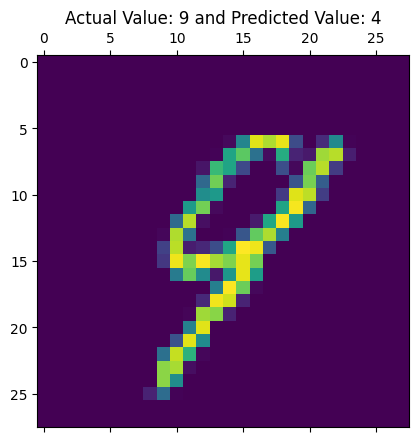

In [73]:
for i in range(200):
    if y_test[i] != y_predicted_labels[i]:
        plt.matshow(x_test[i])
        plt.title(
            f"Actual Value: {y_test[i]} and Predicted Value: {y_predicted_labels[i]}"
        )